In [1]:
"""
Import packages
"""
import uproot
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

print("Your uproot version: ", uproot.__version__)
print("Info: uproot 4+ is recommended.")

#give path to the simulation output .root file
f = uproot.open('/home/mfedkevych/Work/LZ/code_backup/Analysis/Emergent_gammas_AmBe_exact_geometry_with_outer_W_capsule/simulation_output/outcapsule_with_4438keV_1e7.root')

f.classnames()




Your uproot version:  5.0.10
Info: uproot 4+ is recommended.


{'tcapsule;16': 'TTree', 'tcapsule;15': 'TTree'}

In [2]:
f['tcapsule;16'].show()

t = f['tcapsule;16']
rq = t.arrays(library='np')


name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Eemission            | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
nemission            | int32_t                  | AsDtype('>i4')
idpdgemission        | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
costhemission        | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
E0capsule            | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
ncapsuleprimary      | int32_t                  | AsDtype('>i4')
x0capsule            | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
y0capsule            | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
z0capsule            | std::vector<double>      | AsJagged(AsDtype('>f8'), he...


In [3]:
EmergentGammas = rq['Eemission']
PrimaryGammas = rq['E0capsule']

print(len(PrimaryGammas))
EmergentGammas = np.concatenate( list(EmergentGammas), axis=0 )
PrimaryGammas = np.concatenate( list(PrimaryGammas), axis=0 )

EmergentGammas = EmergentGammas.flatten()
PrimaryGammas = PrimaryGammas.flatten()

print(type(EmergentGammas))
print(EmergentGammas)

print(len(PrimaryGammas))

10000000
<class 'numpy.ndarray'>
[ 739.58375069  722.01017484 4437.99913234 ... 2850.22631414  399.28891738
  510.99891   ]
10000000


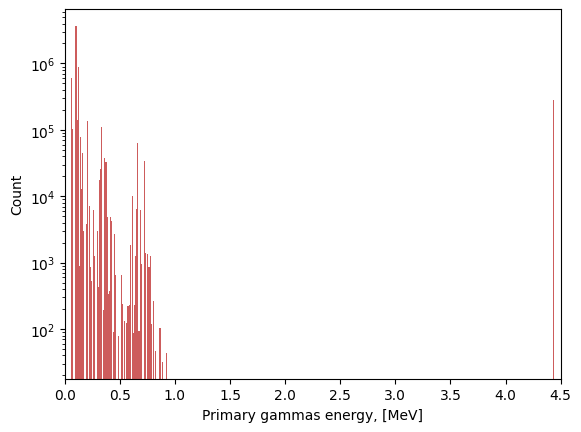

In [4]:
#plot primary gammas' spectrum

plt.hist(PrimaryGammas/1000, bins=450, range=(0, 4.5), color='indianred')
plt.xlabel('Primary gammas energy, [MeV]')
plt.ylabel('Count')
plt.xlim(0,4.5)
plt.yscale('log')
#plt.savefig("Primary_gammas_AmBe_with_4438keV.png", bbox_inches ='tight')
plt.show()

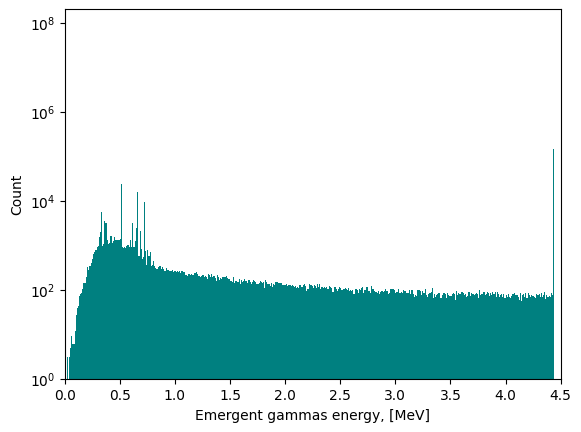

In [5]:
#plot detected gammas' spectrum

plt.hist(EmergentGammas/1000, bins=450, range=(0, 4.5), color='teal')
plt.xlabel('Emergent gammas energy, [MeV]')
plt.ylabel('Count')
plt.xlim(0,4.5)
plt.ylim(1,2e8)
plt.yscale('log')
#plt.savefig("Emergent_gammas_AmBe_with_4438keV.png", bbox_inches ='tight')
plt.show()

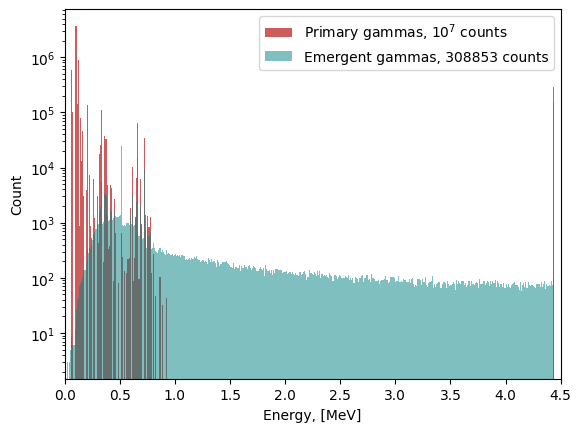

In [6]:
#plot primary and detected gammas' spectra

plt.hist(PrimaryGammas/1000, bins=450, range=(0, 4.5), color='indianred', label=r'Primary gammas, $10^7$ counts')
plt.hist(EmergentGammas/1000, bins=450, range=(0, 4.5), color='teal', alpha=0.5, label='Emergent gammas, {} counts'.format(len(EmergentGammas)))
plt.xlabel('Energy, [MeV]')
plt.ylabel('Count')
plt.legend()
plt.xlim(0,4.5)
plt.yscale('log')
plt.savefig("Primary_and_emergent_gammas_AmBe_with_4438keV.png", bbox_inches ='tight')
plt.show()

In [7]:
print(len(EmergentGammas)/len(PrimaryGammas))

0.0308853
